In [153]:
# importing required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats as st
import scipy.stats
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, labs, geom_histogram,geom_density,geom_dotplot
import squarify

In [154]:
## reading and getting info about data
df = pd.read_csv('D:\\DAI 101\\archive\\messy_IMDB_dataset.csv',sep=';',encoding='Windows-1252') # read the data
df.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


In [155]:
## renaming columns and removing nan column
df=df.rename(columns={'Original titlÊ':'Original title','Genrë¨':'Genre'})
df=df.drop(columns='Unnamed: 8') # drops a a particular row or column
df

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"
...,...,...,...,...,...,...,...,...,...,...,...
96,tt0070735,The Sting,1974-03-21,"Comedy, Crime, Drama",129,USA,PG,George Roy Hill,$ 156000000,236.285,7.5
97,tt0082096,Das Boot,1982-03-18,"Adventure, Drama, Thriller",149,West Germany,R,Wolfgang Petersen,$ 11487676,226.427,7.5
98,tt0059578,Per qualche dollaro in piÃ¹,1965-12-20,Western,132,Italy,NaN,Sergio Leone,$ 15000000,226.039,7.4
99,tt1832382,Jodaeiye Nader az Simin,2011-10-21,Drama,123,Iran,PG-13,Asghar Farhadi,$ 22926076,214.165,7.4


In [156]:
# checking how many null values are in each column
df.isna().sum() # gives all empty rows of a particular column

IMBD title ID      1
Original title     1
Release year       1
Genre              1
Duration           2
Country            1
Content Rating    24
Director           1
Income             1
 Votes             1
Score              1
dtype: int64

In [157]:
# as there are lot of missing values in content rating we will first correct it
df['Content Rating'].unique() # used to find unique values in each column

array(['R', 'PG-13', 'Not Rated', 'Approved', nan, 'PG', 'Unrated', 'G'],
      dtype=object)

In [158]:
df[df['Content Rating'].isna()]

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income,Votes,Score
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,tt0118799,La vita B9 bella,1997-12-20,"Comedy, Drama, Romance",116,Italy1,NaN,Roberto Benigni,$ 230098753,605.648,8.6
28,tt6751668,Gisaengchung,2019-11-07,"Comedy, Drama, Thriller",132,South Korea,NaN,Bong Joon Ho,$ 257604912,470.931,8.6
36,tt0110413,LÃ©on,1995-04-07,"Action, Crime, Drama",110,France,NaN,Luc Besson,$ 19552639,1.007.598,8.5
40,tt7286456,Joker,2019-10-03,"Crime, Drama, Thriller",122,USA,NaN,Todd Phillips,$ 1074251311,855.097,8.4
41,tt1675434,Intouchables,2012-02-24,"Biography, Comedy, Drama",112,France,NaN,"Olivier Nakache, Ã‰ric Toledano",$ 426588510,736.691,8.4
47,tt0095327,Hotaru no haka,2015-10-11,"Animation, Drama, War",89,Japan,NaN,Isao Takahata,$ 516962,225.438,8.3
48,tt0095765,Nuovo Cinema Paradiso,1988-11-17,Drama,155,Italy,NaN,Giuseppe Tornatore,$ 13826605,223.050,8.3
56,tt4154756,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,NaN,"Anthony Russo, Joe Russo",$ 2048359754,796.486,8.2
58,tt4154796,Avengers: Endgame,2019-04-24,"Action, Adventure, Drama",181,USA,NaN,"Anthony Russo, Joe Russo",$ 2797800564,754.786,8.2


In [159]:
df['Content Rating']=df['Content Rating'].replace('Unrated','Not Rated') # replace a particular value in table
df['Content Rating'].unique()

array(['R', 'PG-13', 'Not Rated', 'Approved', nan, 'PG', 'G'],
      dtype=object)

In [160]:
df['Content Rating']=df['Content Rating'].fillna('Not Rated') # used to fill empty rows in a column or vice versa
df.isna().sum()

IMBD title ID     1
Original title    1
Release year      1
Genre             1
Duration          2
Country           1
Content Rating    0
Director          1
Income            1
 Votes            1
Score             1
dtype: int64

In [161]:
# correcting the country column
df['Country'].unique()

array(['USA', 'US', 'New Zealand', 'UK', 'New Zesland', 'Italy', nan,
       'New Zeland', 'US.', 'Brazil', 'Japan', 'Italy1', 'South Korea',
       'France', 'Germany', 'India', 'Denmark', 'West Germany', 'Iran'],
      dtype=object)

In [162]:
map = {'US.':'USA','US':'USA','New Zesland':'New Zealand','New Zeland':'New Zealand','Italy1':'Italy'}
df['Country']=df['Country'].replace(map,regex=False)
df['Country'].unique()

array(['USA', 'New Zealand', 'UK', 'Italy', nan, 'Brazil', 'Japan',
       'South Korea', 'France', 'Germany', 'India', 'Denmark',
       'West Germany', 'Iran'], dtype=object)

In [163]:
# correcting the income column
map={' ':'','o':'0',',':''}
df['Income']=df['Income'].str[1:].replace(map,regex=True)

In [164]:
df=df.dropna(subset='Income')
df['Income']=df['Income'].astype(int)
df=df.rename(columns={'Income':'Income(in $)'})
df.head()

C:\Users\arshr\AppData\Local\Temp\ipykernel_33784\2929121977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income(in $),Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,222831817,1.780.147,"8,9f"


In [165]:
# correcting votes column
df.columns

Index(['IMBD title ID', 'Original title', 'Release year', 'Genre', 'Duration',
       'Country', 'Content Rating', 'Director', 'Income(in $)', ' Votes ',
       'Score'],
      dtype='object')

In [166]:
df=df.rename(columns={' Votes ':'Votes'})
df['Votes'].str.replace('.',',')
df['Votes']=df['Votes'].str.replace('.','')
df['Votes']=df['Votes'].astype(int)
df.head()

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income(in $),Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,222831817,1780147,"8,9f"


In [167]:
# correcting the score column
df['Score'].value_counts()

Score
8.6       11
8.2        8
8.3        8
8.4        7
8.1        7
7.8        6
8.5        6
8.0        6
7.5        6
7.9        5
7.7        4
7.6        4
7.4        3
8.8        3
8.9        2
8.7        2
8.7.       1
++8.7      1
9.         1
9,.0       1
9.2        1
9.3        1
8:8        1
8..8       1
8,9f       1
08.9       1
8,7e-0     1
8,6        1
Name: count, dtype: int64

In [168]:
map = {'8,9f':'8.9','9,.0':'9.0','08.9':'8.9','8:8':'8.8','8,7e-0':'8.7','++8.7':'8.7','8..8':'8.8','8,6':'8.6','8.7.':'8.7','9.':'9.0'}
df['Score']=df['Score'].replace(map,regex=False).astype(float)
df.head()

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income(in $),Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.0
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,222831817,1780147,8.9


In [169]:
# correcting the score column
df[df['Duration'].isna()]

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income(in $),Votes,Score
14,tt0133093,The Matrix,1999-05-07,"Action, Sci-Fi",NaN,USA,R,"Lana Wachowski, Lilly Wachowski",465718588,1632315,8.7


In [170]:
df['Duration'].unique()

array(['142', '175', '152', '220', ' ', '201', 'Nan', '96', '148', 'Inf',
       '178c', '161', nan, '179', 'Not Applicable', '146', '-', '169',
       '127', '118', '121', '189', '130', '125', '116', '132', '207',
       '155', '151', '119', '110', '137', '106', '88', '122', '112',
       '150', '109', '102', '165', '89', '87', '164', '113', '98', '115',
       '149', '117', '181', '147', '120', '95', '105', '170', '134',
       '229', '153', '178', '131', '99', '108', '81', '126', '104', '136',
       '103', '114', '160', '128', '228', '129', '123'], dtype=object)

In [171]:
map = {' ': 'nan', 'Nan': '', 'Inf': '', '178c': '178', 'nan': '', 'Not Applicable': '', '-': ''}
df['Duration'] = df['Duration'].replace(map, regex=False)
df = df[df['Duration'] != '']
df


,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income(in $),Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.0
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",nan,USA,R,Quentin Tarantino,222831817,1780147,8.9
...,...,...,...,...,...,...,...,...,...,...,...
96,tt0070735,The Sting,1974-03-21,"Comedy, Crime, Drama",129,USA,PG,George Roy Hill,156000000,236285,7.5
97,tt0082096,Das Boot,1982-03-18,"Adventure, Drama, Thriller",149,West Germany,R,Wolfgang Petersen,11487676,226427,7.5
98,tt0059578,Per qualche dollaro in piÃ¹,1965-12-20,Western,132,Italy,Not Rated,Sergio Leone,15000000,226039,7.4
99,tt1832382,Jodaeiye Nader az Simin,2011-10-21,Drama,123,Iran,PG-13,Asghar Farhadi,22926076,214165,7.4


In [172]:
df = df.drop('Release year', axis=1)
df

,IMBD title ID,Original title,Genre,Duration,Country,Content Rating,Director,Income(in $),Votes,Score
0,tt0111161,The Shawshank Redemption,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
1,tt0068646,The Godfather,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
2,tt0468569,The Dark Knight,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.0
3,tt0071562,The Godfather: Part II,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9.0
4,tt0110912,Pulp Fiction,"Crime, Drama",nan,USA,R,Quentin Tarantino,222831817,1780147,8.9
...,...,...,...,...,...,...,...,...,...,...
96,tt0070735,The Sting,"Comedy, Crime, Drama",129,USA,PG,George Roy Hill,156000000,236285,7.5
97,tt0082096,Das Boot,"Adventure, Drama, Thriller",149,West Germany,R,Wolfgang Petersen,11487676,226427,7.5
98,tt0059578,Per qualche dollaro in piÃ¹,Western,132,Italy,Not Rated,Sergio Leone,15000000,226039,7.4
99,tt1832382,Jodaeiye Nader az Simin,Drama,123,Iran,PG-13,Asghar Farhadi,22926076,214165,7.4


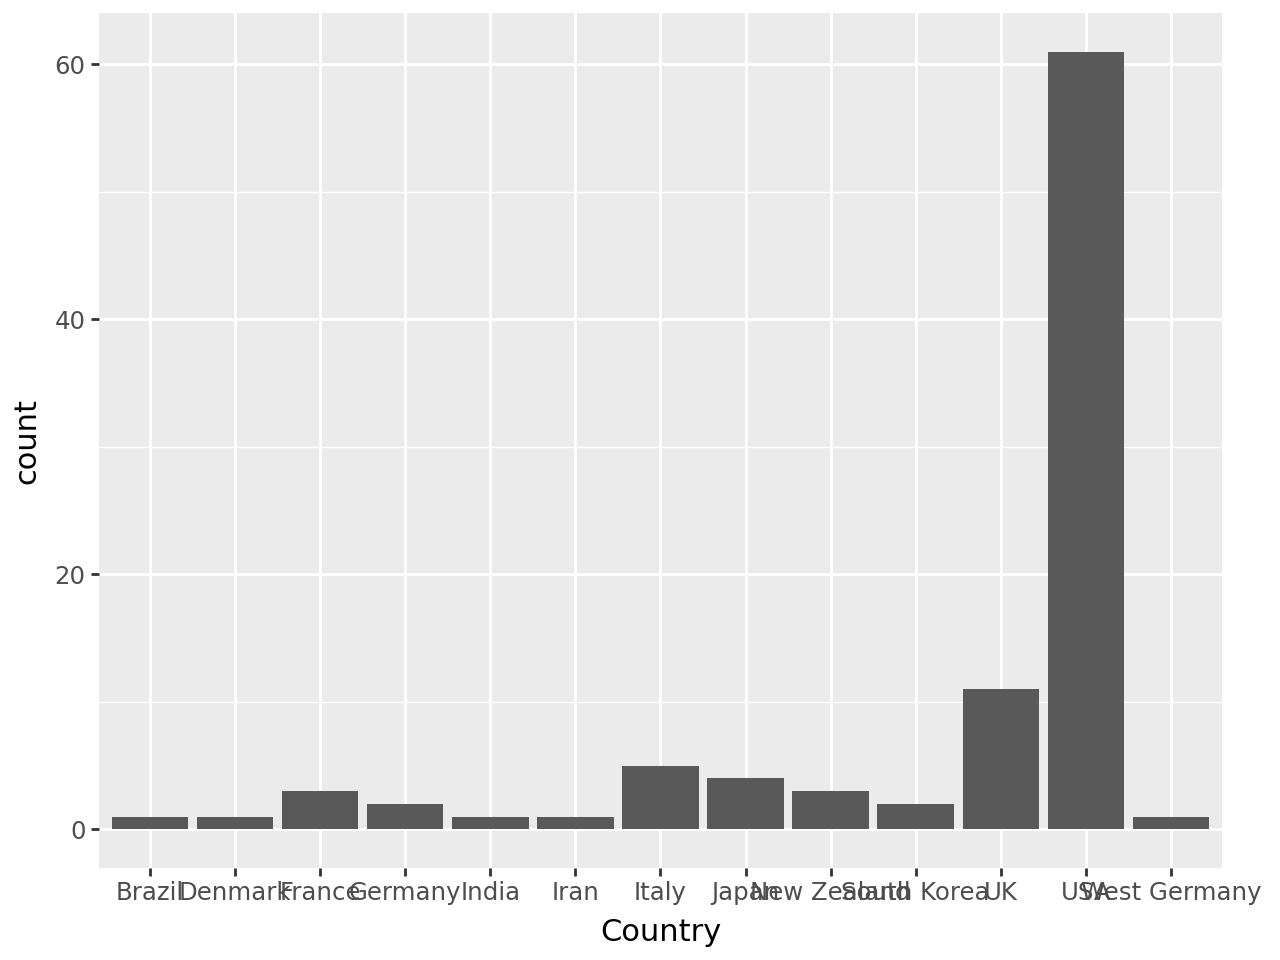

In [173]:
# univariate analysis
# for categorical data
# simple bar chart
#data(df, package = "mosaicData")

# plot the distribution of race
ggplot(df, aes(x = "Country")) + geom_bar()




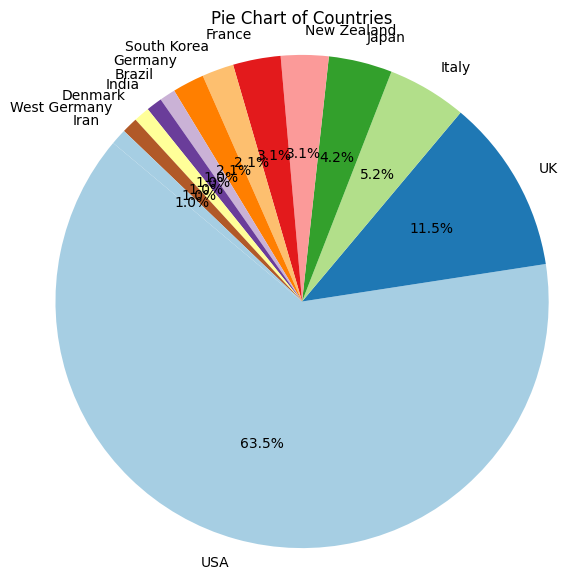

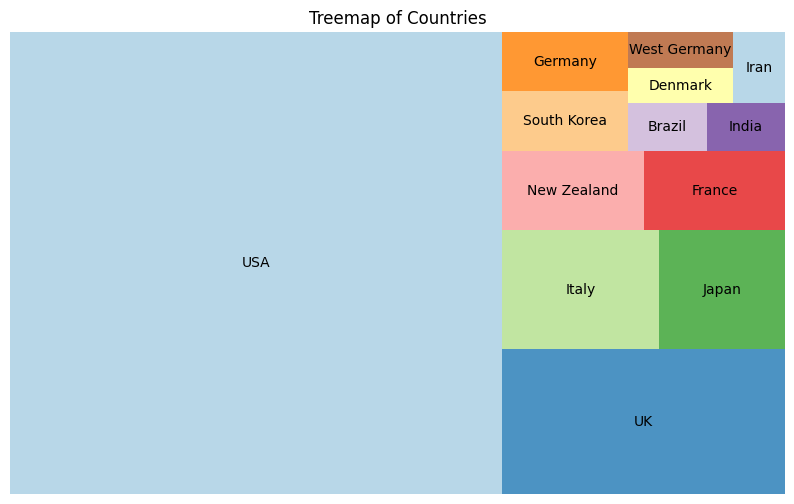

In [174]:
data=df
country_counts = df['Country'].value_counts()

# PIE CHART
def pie_chart(data):
    plt.figure(figsize=(7, 7))
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
    plt.title('Pie Chart of Countries')
    plt.show()

# TREEMAP
def treemap(data):
    plt.figure(figsize=(10, 6))
    squarify.plot(sizes=data.values, label=data.index, alpha=.8, color=plt.cm.Paired.colors)
    plt.axis('off')
    plt.title('Treemap of Countries')
    plt.show() 
pie_chart(country_counts)
treemap(country_counts)

c:\Users\arshr\OneDrive\Documents\pandas\my_env\lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.


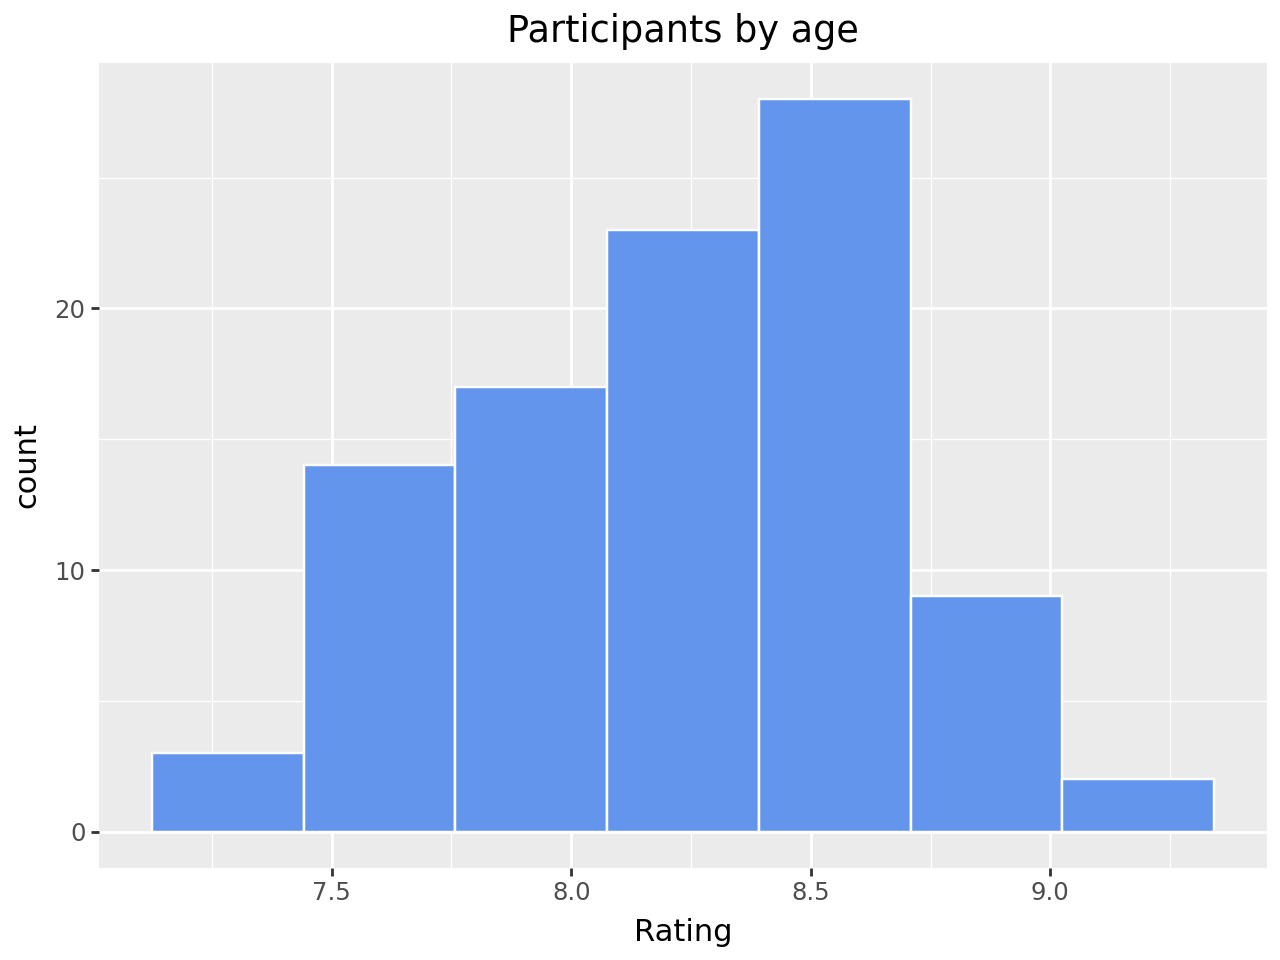

In [175]:
# for numerical data
# plot the histogram with blue bars and white borders
ggplot(df, aes(x = "Score")) +geom_histogram(fill = "cornflowerblue", color = "white") + labs(title="Participants by age",x = "Rating")

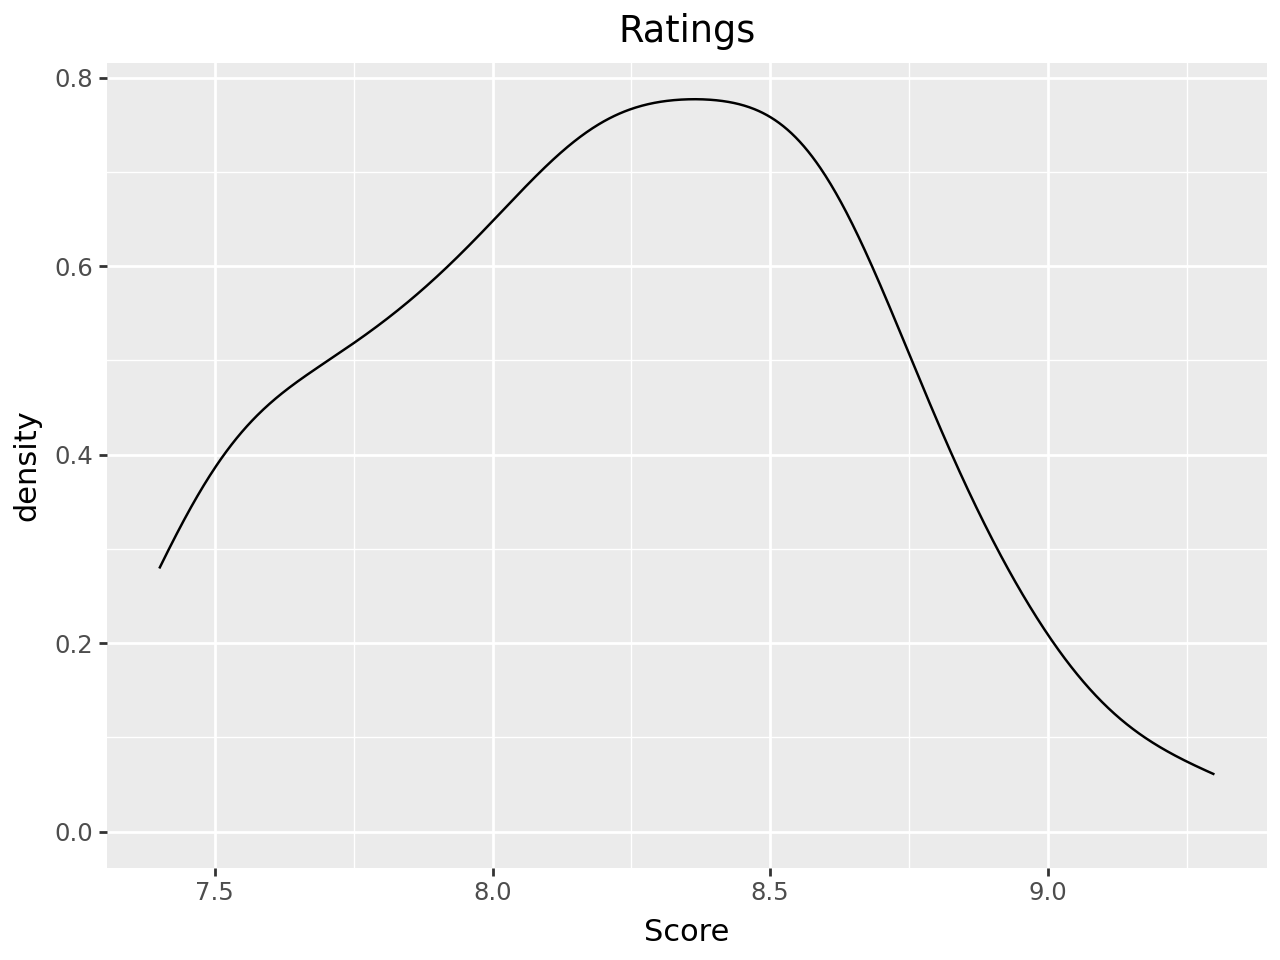

In [176]:
# Create a kernel density plot of rating
ggplot(df, aes(x = "Score")) +geom_density() + labs(title = "Ratings")

c:\Users\arshr\OneDrive\Documents\pandas\my_env\lib\site-packages\plotnine\stats\stat_bindot.py:122: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.


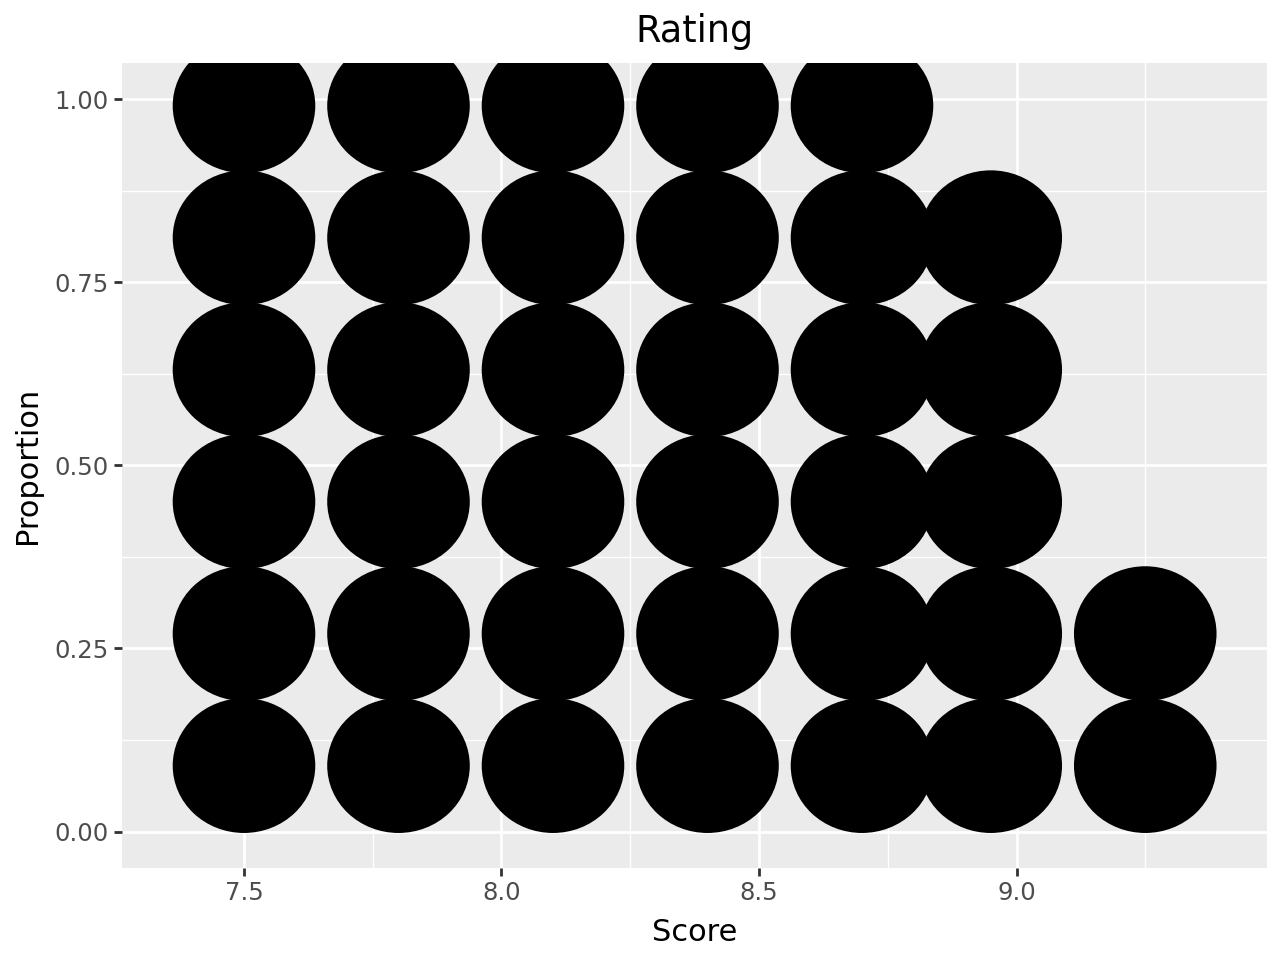

In [177]:
# plot the rating distribution using a dotplot
ggplot(df, aes(x = "Score")) +geom_dotplot() + labs(title = "Rating",y = "Proportion",x = "Score")

In [178]:
# bivariate analysis
# categorical and categorical 
pd.crosstab(df['Content Rating'] , df.Director, margins=True, values=df['Content Rating'] , aggfunc=pd.Series.count)

Director,Akira Kurosawa,Alfred Hitchcock,Andrew Stanton,"Anthony Russo, Joe Russo",Asghar Farhadi,Billy Wilder,"Bob Persichetti, Peter Ramsey",Bong Joon Ho,Brian De Palma,Bryan Singer,...,Sergio Leone,Sidney Lumet,Stanley Donen,Stanley Kubrick,Steven Spielberg,Thomas Vinterberg,Todd Phillips,Tony Kaye,Wolfgang Petersen,All
Content Rating,,,,,,,,,,,,,,,,,,,,,
Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
G,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6
Not Rated,1.0,3.0,NaN,2.0,NaN,1.0,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,25
PG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,10
PG-13,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
R,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,42
All,1.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,96


<Axes: xlabel='Director', ylabel='Content Rating'>

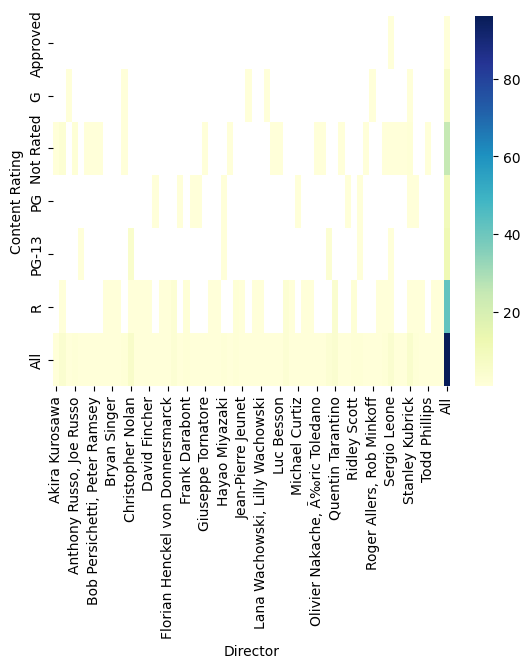

In [179]:
sns.heatmap(pd.crosstab(df['Content Rating'] , df.Director, margins=True, values=df['Content Rating'] , aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=False, cbar=True)

<Axes: xlabel='Content Rating', ylabel='Score'>

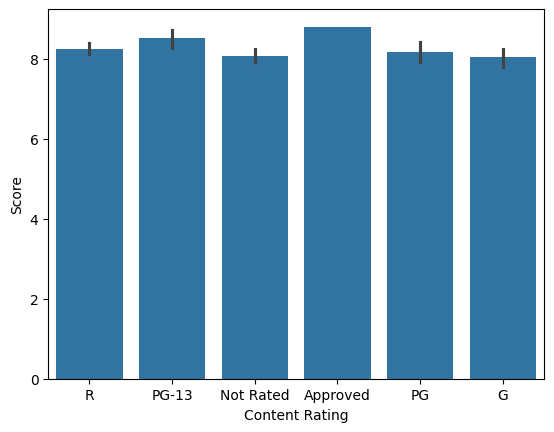

In [180]:
# categorical and numerical 
sns.barplot(x='Content Rating',y='Score',data=df)

C:\Users\arshr\AppData\Local\Temp\ipykernel_33784\167824581.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



<Axes: xlabel='Content Rating', ylabel='Score'>

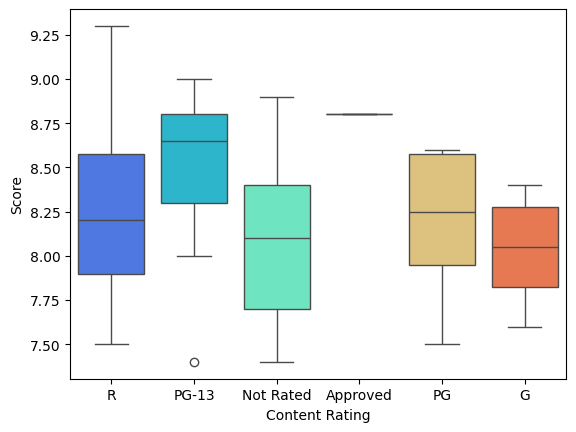

In [181]:
sns.boxplot(x='Content Rating',y='Score',data=df,palette='rainbow')

C:\Users\arshr\AppData\Local\Temp\ipykernel_33784\491286245.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



<Axes: xlabel='Content Rating', ylabel='Score'>

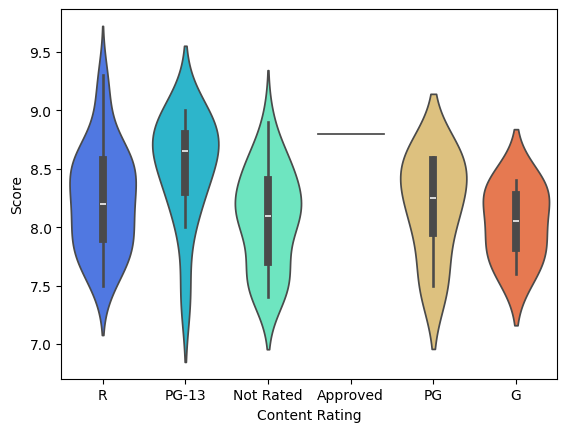

In [182]:
sns.violinplot(x='Content Rating',y='Score',data=df,palette='rainbow')

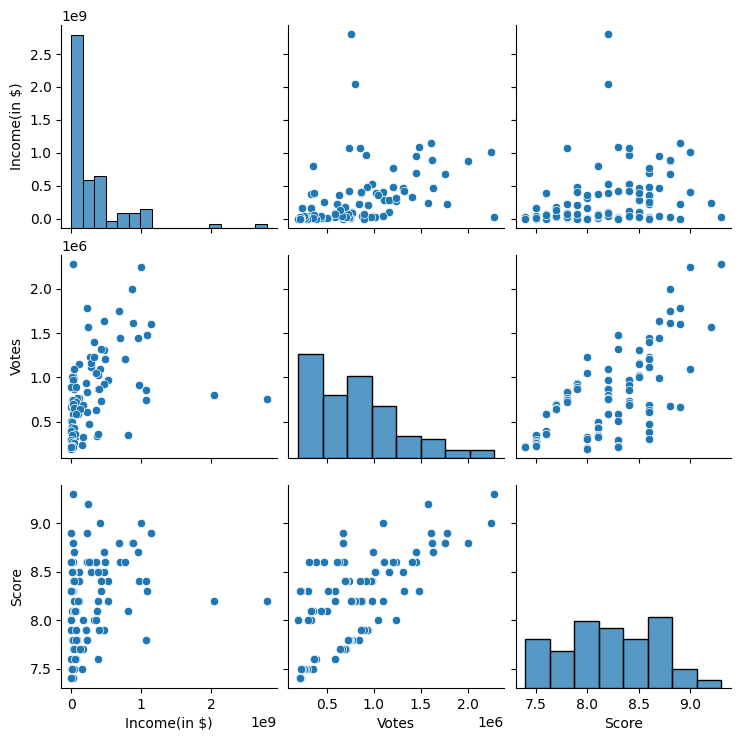

In [183]:
g = sns.pairplot(df)

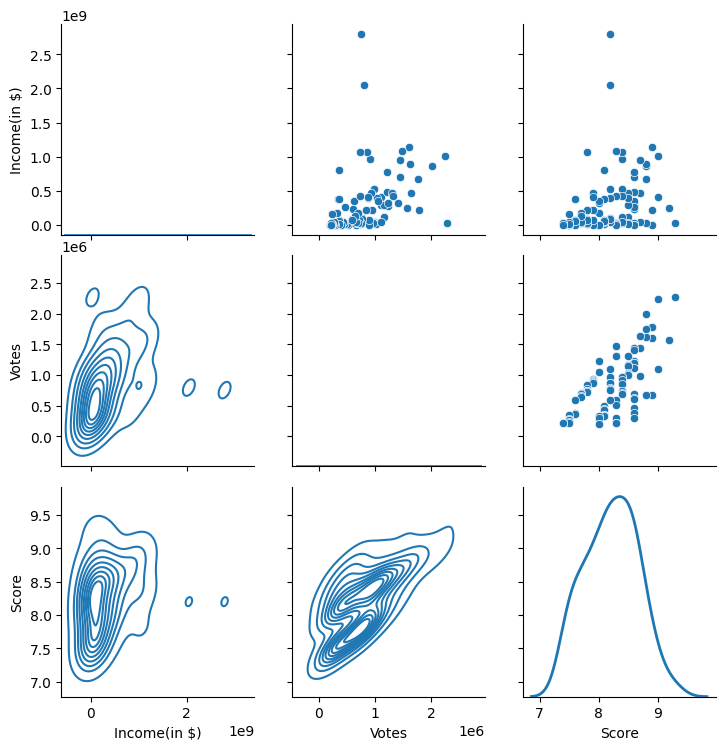

In [184]:
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)

In [185]:
# Chi2 test - Categorical and Categorical
contigency= pd.crosstab(df['Score'], df['Votes']) 
contigency

Votes,195789,197381,211250,213152,214165,223050,225438,226039,226427,236285,...,1480582,1572674,1604280,1619920,1632315,1755490,1780147,2002816,2241615,2278845
Score,,,,,,,,,,,,,,,,,,,,,
7.4,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7.5,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
contigency_pct = pd.crosstab(df['Score'], df['Votes'], normalize='index')
contigency_pct

Votes,195789,197381,211250,213152,214165,223050,225438,226039,226427,236285,...,1480582,1572674,1604280,1619920,1632315,1755490,1780147,2002816,2241615,2278845
Score,,,,,,,,,,,,,,,,,,,,,
7.4,0.000000,0.000000,0.000,0.333333,0.333333,0.000,0.000,0.333333,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
7.5,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.166667,0.166667,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
7.6,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
7.7,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
7.8,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
7.9,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
8.0,0.166667,0.166667,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
8.1,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0
8.2,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,...,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0


<Axes: xlabel='Votes', ylabel='Score'>

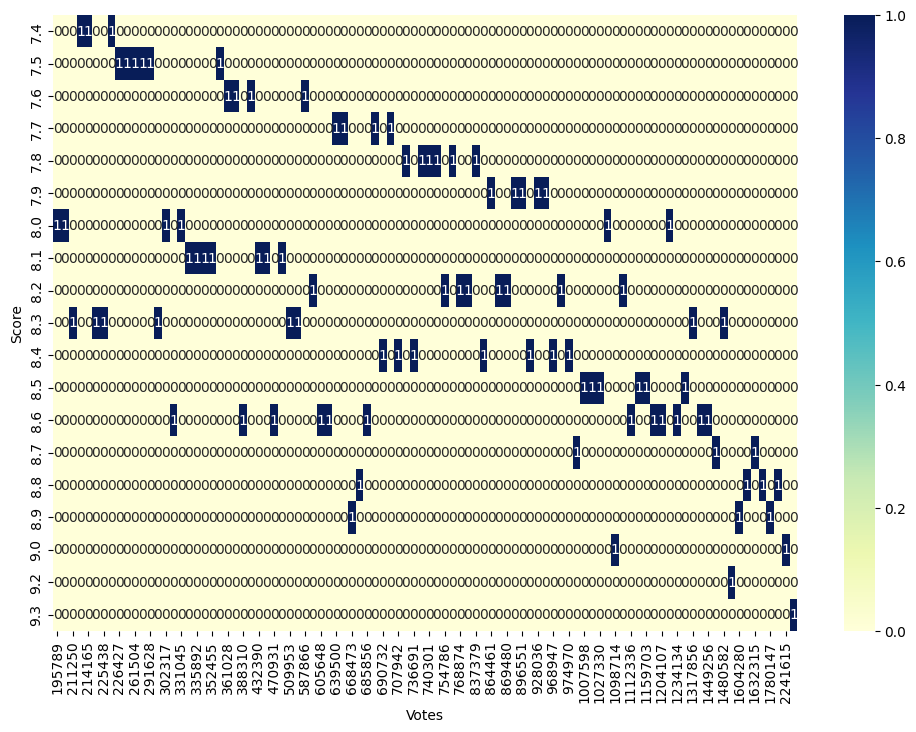

In [187]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [188]:
c, p, dof, expected = chi2_contingency(contigency) 
print(p)

0.3752006634826916


In [189]:
# t-test - Categorical and Numerical
tt=df.dropna(axis=0,how='any')
tt.describe()

,Income(in $),Votes,Score
count,9.500000e+01,9.500000e+01,95.000000
mean,2.985796e+08,8.034840e+05,8.212632
std,4.454999e+08,4.749429e+05,0.446319
min,5.760000e+02,1.957890e+05,7.400000
25%,2.313382e+07,3.756035e+05,7.900000
50%,1.081103e+08,7.397170e+05,8.200000
75%,3.971993e+08,1.038170e+06,8.600000
max,2.797801e+09,2.278845e+06,9.300000


In [190]:
a = tt.loc[tt['Content Rating'] == 'A', 'Score'].to_numpy()
b = tt.loc[tt['Content Rating'] == 'B', 'Score'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

C:\Users\arshr\AppData\Local\Temp\ipykernel_33784\2547887785.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [191]:
# ANOVA - Categorical and Numerical
a = tt.loc[tt['Content Rating'] == 'A', 'Score'].to_numpy()
b = tt.loc[tt['Content Rating'] == 'B', 'Score'].to_numpy()
c = tt.loc[tt['Content Rating'] == 'C', 'Score'].to_numpy()
fvalue, pvalue = st.f_oneway(a,b,c)
print(fvalue, pvalue)

nan nan


C:\Users\arshr\AppData\Local\Temp\ipykernel_33784\2537987668.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.


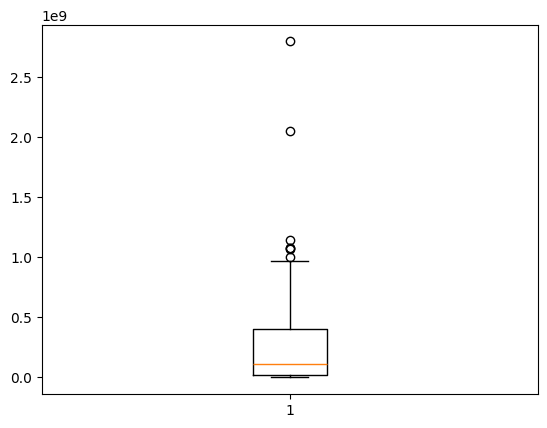

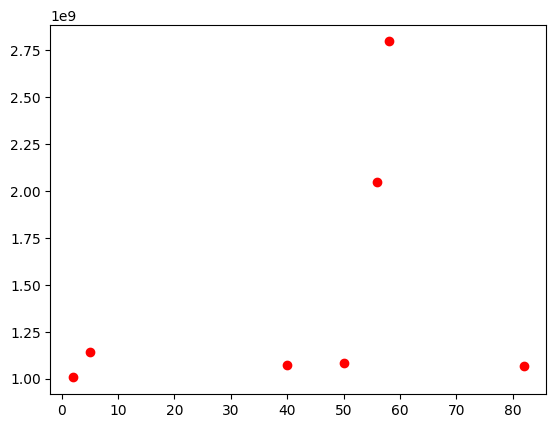

In [192]:
# Check for outliers
# Calculate the IQR for a specific column in the dataset
column_name = "Income(in $)"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]
# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

In [193]:
# Check for outliers
# Option 1: Z-Score
z = np.abs(scipy.stats.zscore(df["Income(in $)"]))
print(z)

# Option 2: Interquartile Range (IQR)
Q1 = df["Income(in $)"].quantile(0.25)
Q3 = df["Income(in $)"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(df[(df["Income(in $)"] < lower) | (df["Income(in $)"] > upper)])

# Handle outliers
# Option 1: Drop outliers
df = df[(z < 3)]

# Option 2: Replace outliers with mean/median/mode
df["Income(in $)"][df["Income(in $)"] < lower] = lower
df["Income(in $)"][df["Income(in $)"] > upper] = upper

0      0.615433
1      0.122857
2      1.598360
3      0.244163
4      0.175647
         ...   
96     0.327138
97     0.654711
98     0.646749
99     0.628783
100    0.676525
Name: Income(in $), Length: 96, dtype: float64
   IMBD title ID                                 Original title  \
2      tt0468569                                The Dark Knight   
5      tt0167260  The Lord of the Rings: The Return of the King   
40     tt7286456                                          Joker   
50     tt1345836                          The Dark Knight Rises   
56     tt4154756                         Avengers: Infinity War   
58     tt4154796                              Avengers: Endgame   
82     tt0435761                                    Toy Story 3   

                           Genre Duration      Country Content Rating  \
2           Action, Crime, Drama      152          USA          PG-13   
5       Action, Adventure, Drama      201  New Zealand          PG-13   
40        Crime, Dram

C:\Users\arshr\AppData\Local\Temp\ipykernel_33784\2065550243.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\arshr\AppData\Local\Temp\ipykernel_33784\2065550243.py:19: SettingWithCopyWarning: 
A value is trying to be set on a cop